In [8]:
from pathlib import Path
import numpy as np
import geopandas as gpd 
import copy
import pandas as pd
from shapely.geometry import box
import seaborn as sns
import cartopy.crs as ccrs
import cartopy as ctp
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from climada.hazard import Hazard

/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 13.0.0. Please consider upgrading.
  warnings.warn(


In [10]:
data_dir = Path('../data/')

In [12]:
# load hazard data
haz = Hazard.from_hdf5(data_dir.joinpath('filtered_hazard.hdf5'))
haz_intensities = haz.intensity.toarray().flatten()
haz_lons = haz.u_coord.x.toarray()
haz_lats = haz.u_coord.y.toarray()
haz_df = pd.DataFrame(data=(haz_lons, haz_lats, haz_intensities), columns=('lon', 'lat', 'intensity'))
haz_df = haz_df[haz_df['intensity']!=0]

# load company geodataframe

AttributeError: 'NoneType' object has no attribute 'items'

/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


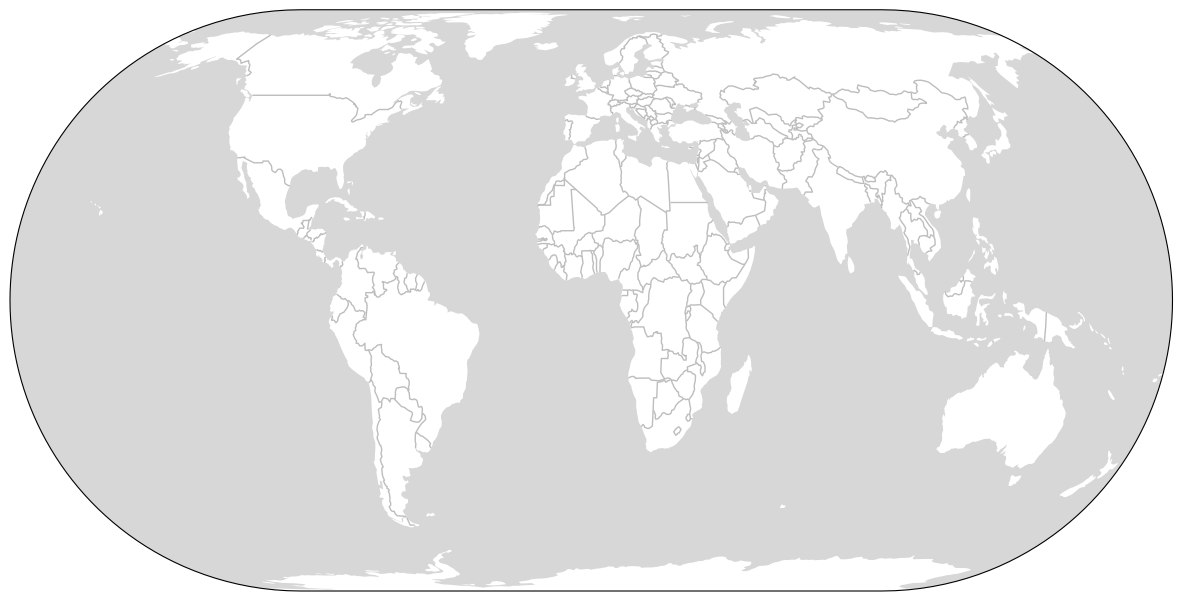

In [5]:
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={'projection': ccrs.EckertIV()})
ax.add_feature(cfeature.BORDERS, edgecolor='#BDBDBD')
ax.add_feature(cfeature.OCEAN, facecolor='#D7D7D7')
ax.scatter(x=haz_df['lon'], y=haz_df['lat'], c=haz_df['intensity'], s=0.5, cmap='viridis', transform=ccrs.PlateCarree())